#### Important Findings:

- **Global Plastic Production is constantly increasing throughout these years. The World is producing four times as much plastics as four decades ago.**
- **Mismanaged Waste in 2010 is highest for 2010 and nearly zero for Christmas Island, Cocos Islands, Falkland Islands, Niue, and Saint Pierre and Miquelon.**
- **The GDP per person is highest in Europe and the lowest in Africa in 2010. We do not have enough data to say that Antarctica has the lowest GDP per person in 2010.**
- **In 2010, Per Person Plastic Waste is highest for Kuwait and lowest for India.**
- **As the GDP per person increases Plastic waste per person also increases.**

In [1]:
#python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [6]:
#downloading the dataset
!kaggle datasets download -d sohamgade/plastic-datasets


  0%|          | 0.00/734k [00:00<?, ?B/s]
100%|##########| 734k/734k [00:00<00:00, 2.23MB/s]
100%|##########| 734k/734k [00:00<00:00, 2.21MB/s]


In [7]:
#extracting the zip file
from zipfile import ZipFile
dataset = "plastic-datasets.zip"
with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print("Extracted all the Datasets.")

Extracted all the Datasets.


In [33]:
import os

for lst in os.listdir():
    match = lst.rfind("csv")
    if match>0:
        print(lst)

global-plastics-production.csv
mismanaged-waste-global-total.csv
per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv
per-capita-plastic-waste-vs-gdp-per-capita.csv
plastic-waste-per-capita.csv


## Dataset: Global Plastics Production

In [53]:
gpp = pd.read_csv("global-plastics-production.csv")
gpp.head()

,Entity,Code,Year,Global plastics production (million tonnes)
0,World,OWID_WRL,1950,2000000
1,World,OWID_WRL,1951,2000000
2,World,OWID_WRL,1952,2000000
3,World,OWID_WRL,1953,3000000
4,World,OWID_WRL,1954,3000000


In [54]:
gpp.info()
#There is no missing value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Entity                                       66 non-null     object
 1   Code                                         66 non-null     object
 2   Year                                         66 non-null     int64 
 3   Global plastics production (million tonnes)  66 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ KB


In [55]:
gpp.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,66.0,1.982500e+03,1.919635e+01,1950.0,1966.25,1982.5,1.998750e+03,2015.0
Global plastics production (million tonnes),66.0,1.185303e+08,1.126182e+08,2000000.0,20750000.00,76500000.0,1.985000e+08,381000000.0


In [56]:
gpp.shape

(66, 4)

In [57]:
print("The Dataset is from {} to {}.".format(min(gpp.Year),max(gpp.Year)))

The Dataset is from 1950 to 2015.


In [58]:
gpp['Entity'].value_counts()
#So, There is only one Entity

World    66
Name: Entity, dtype: int64

In [59]:
gpp['Code'].value_counts() #it is a iso-code for world {no use}

OWID_WRL    66
Name: Code, dtype: int64

### Year wise Global Production of Plastic

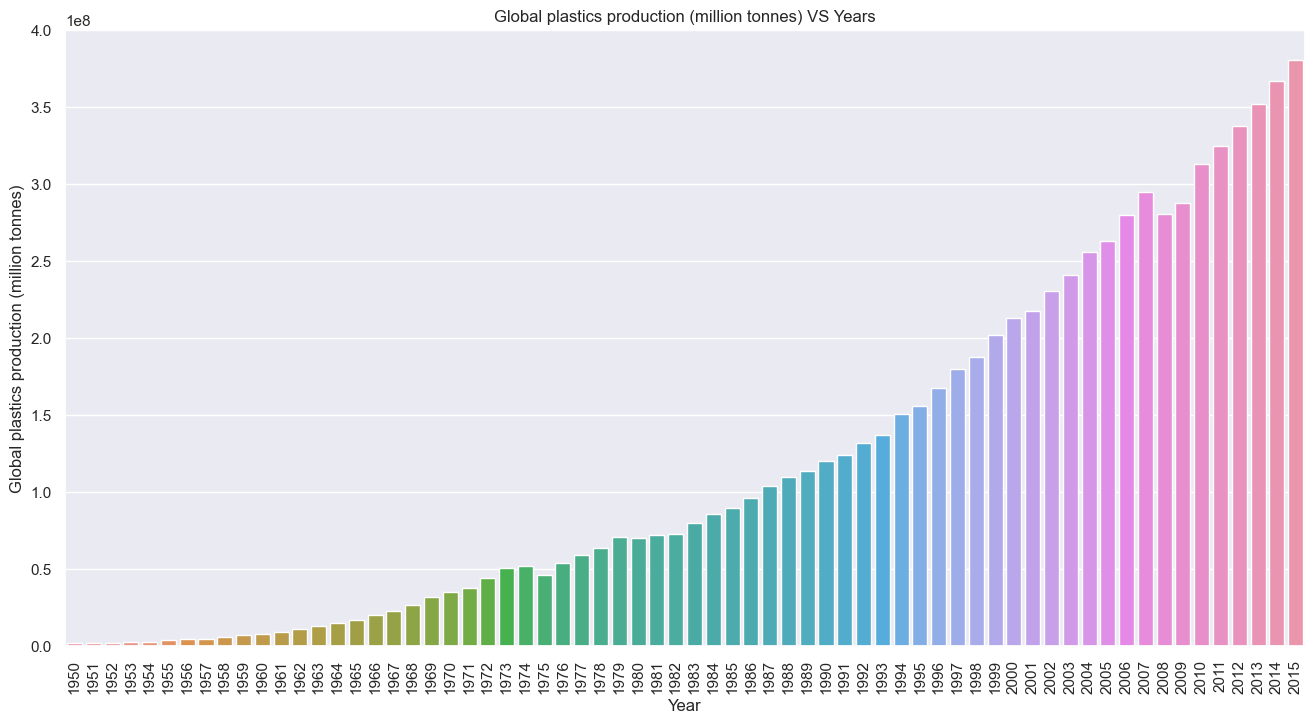

In [61]:
plt.figure(figsize=(16,8))
sns.barplot(x=gpp['Year'],y=gpp['Global plastics production (million tonnes)'])
plt.title("Global plastics production (million tonnes) VS Years")
plt.xticks(rotation=90)
plt.show()

- **Global Plastic Production is constantly increasing throughout these years. The World is producing four times as much plastics as four decades ago.**

## Dataset: Mismanaged Waste Global Total

In [62]:
mwgt = pd.read_csv("mismanaged-waste-global-total.csv")
mwgt.head()

,Entity,Code,Year,Mismanaged waste (% global total)
0,Albania,ALB,2010,0.0933
1,Algeria,DZA,2010,1.6347
2,Angola,AGO,2010,0.1964
3,Anguilla,AIA,2010,0.0002
4,Antigua and Barbuda,ATG,2010,0.0039


In [63]:
mwgt.info()
#No missing Value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             186 non-null    object 
 1   Code                               186 non-null    object 
 2   Year                               186 non-null    int64  
 3   Mismanaged waste (% global total)  186 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.9+ KB


In [64]:
mwgt.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,186.0,2010.000000,0.000000,2010.0,2010.00000,2010.0000,2010.000000,2010.0000
Mismanaged waste (% global total),186.0,0.537634,2.298779,0.0,0.00685,0.0502,0.208175,27.6966


In [65]:
len(mwgt['Entity'].unique())
#Every Country is mentioned only once.

186

In [66]:
mwgt['Year'].value_counts()
#And we have only 2010 year data.

2010    186
Name: Year, dtype: int64

In [67]:
sum = 0
for i in mwgt['Mismanaged waste (% global total)']:
    sum += i
print(round(sum))

100


### Which Country Mismanaged Waste Maximum and Minimum in 2010 Year?

In [68]:
mwgt[mwgt['Mismanaged waste (% global total)'] == max(mwgt['Mismanaged waste (% global total)'])]
#So, Maximum Mismanaged is done by China in 2010.

,Entity,Code,Year,Mismanaged waste (% global total)
28,China,CHN,2010,27.6966


In [69]:
mwgt[mwgt['Mismanaged waste (% global total)'] == min(mwgt['Mismanaged waste (% global total)'])]
# We have 5 Country which nearly not mismanaged any waste in 2010.

,Entity,Code,Year,Mismanaged waste (% global total)
29,Christmas Island,CXR,2010,0.0
30,Cocos Islands,CCK,2010,0.0
53,Falkland Islands,FLK,2010,0.0
122,Niue,NIU,2010,0.0
145,Saint Pierre and Miquelon,SPM,2010,0.0


### What is Percentage of Mismanaged Waste by INDIA in 2010?

In [70]:
mwgt[mwgt["Entity"] == "India"]
# it is 1.9 approx.

,Entity,Code,Year,Mismanaged waste (% global total)
79,India,IND,2010,1.8836


### What is Percentage of Mismanaged Waste by USA in 2010?

In [71]:
mwgt[mwgt["Code"] == "USA"]
# it is 0.9 approx.

,Entity,Code,Year,Mismanaged waste (% global total)
180,United States,USA,2010,0.8649


In [72]:
#Geopandas Installation Problem Solution: https://geoffboeing.com/2014/09/using-geopandas-windows/

#first let us merge geopandas data with our data
#'naturalearth_lowres' is geopandas datasets so we can use it directly
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [73]:
## rename the columns so that we can merge with our data
world.columns=['pop_est', 'Continent', 'Entity', 'Code', 'gdp_md_est', 'geometry']
world.head()

,pop_est,Continent,Entity,Code,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


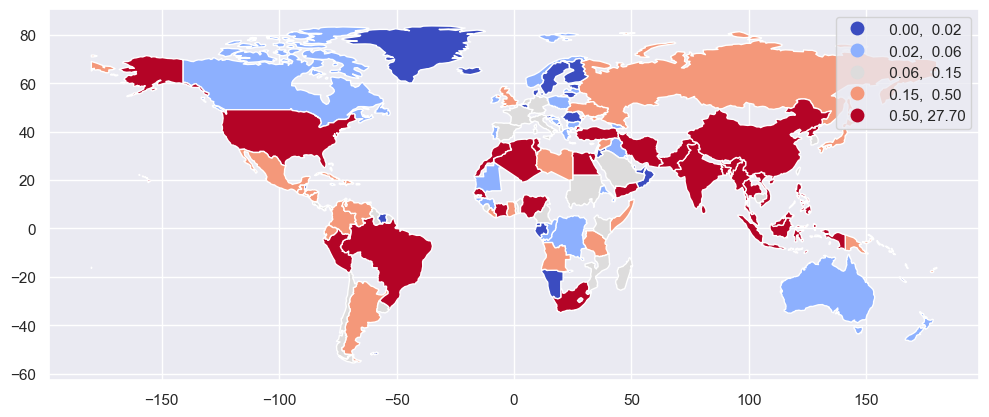

In [74]:
# last thing we need to do is - merge 
merge=pd.merge(world, mwgt,on='Code')
merge.plot(column="Mismanaged waste (% global total)", scheme="quantiles", legend=True, figsize=(12, 10),cmap='coolwarm');

- **So, we can conclude from the above figure, that dataset has many missing countries.**
- **Here, the country which mismanaged their waste more than 0.5 are marked red.**

## Dataset: Per Capita Mismanaged Plastic Waste VS GDP Per Capita

In [75]:
mpw_gdp = pd.read_csv("per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv")
mpw_gdp.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [76]:
mpw_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita mismanaged plastic waste                  186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [77]:
mpw_gdp.isnull().sum()
#The dataset contains soo many null values. It is best to drop all the Null values.

Entity                                                     0
Code                                                    2014
Year                                                       0
Per capita mismanaged plastic waste                    47982
GDP per capita, PPP (constant 2011 international $)    41761
Total population (Gapminder, HYDE & UN)                 1285
Continent                                              47883
dtype: int64

In [78]:
mpw_gdp.shape

(48168, 7)

In [79]:
mpw_gdp.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,48168.0,1.903147e+03,3.157168e+02,-10000.00000,1859.000000,1.920000e+03,1.975000e+03,2.019000e+03
Per capita mismanaged plastic waste,186.0,4.522581e-02,5.007705e-02,0.00100,0.006000,3.200000e-02,6.600000e-02,2.990000e-01
"GDP per capita, PPP (constant 2011 international $)",6407.0,1.492610e+04,1.773975e+04,247.43654,3021.071807,8.447264e+03,1.960754e+04,1.353188e+05
"Total population (Gapminder, HYDE & UN)",46883.0,2.982790e+07,2.530860e+08,905.00000,201733.500000,1.542937e+06,5.886795e+06,7.713468e+09


In [80]:
min(mpw_gdp['Year']) #The dataset contains some negative years also, which needed to remove.

-10000

In [81]:
mpw_gdp['Continent'].value_counts()#So, the dataset has all seven continents.

Europe           75
Asia             62
Africa           61
North America    42
Oceania          26
South America    15
Antarctica        4
Name: Continent, dtype: int64

In [82]:
# mpw_gdp.dropna(inplace=True)
#We can't drop like this because after removing null values from the dataset we will have no data.

In [83]:
#let's do analysis on negative years from the dataset 
mpw_gdp[mpw_gdp['Year']<0]
#As it is clear from this dataset we mostly have null values.

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
221,Africa,NaN,-10000,NaN,NaN,241901.0,NaN
222,Africa,NaN,-9000,NaN,NaN,342782.0,NaN
223,Africa,NaN,-8000,NaN,NaN,490284.0,NaN
224,Africa,NaN,-7000,NaN,NaN,707844.0,NaN
225,Africa,NaN,-6000,NaN,NaN,1031529.0,NaN
...,...,...,...,...,...,...,...
47384,World,OWID_WRL,-5000,NaN,NaN,17920172.0,NaN
47385,World,OWID_WRL,-4000,NaN,NaN,28370428.0,NaN
47386,World,OWID_WRL,-3000,NaN,NaN,44819892.0,NaN
47387,World,OWID_WRL,-2000,NaN,NaN,72108128.0,NaN


In [84]:
mpw_gdp.shape

(48168, 7)

In [85]:
new_mpw_gdp = mpw_gdp[mpw_gdp['Year']>0]
new_mpw_gdp.shape

(48092, 7)

In [86]:
#let's check 
new_mpw_gdp[new_mpw_gdp['Year']<0]
#looks fine.

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent


### Which Continent, GDP per person is Highest and Lowest in 2011?

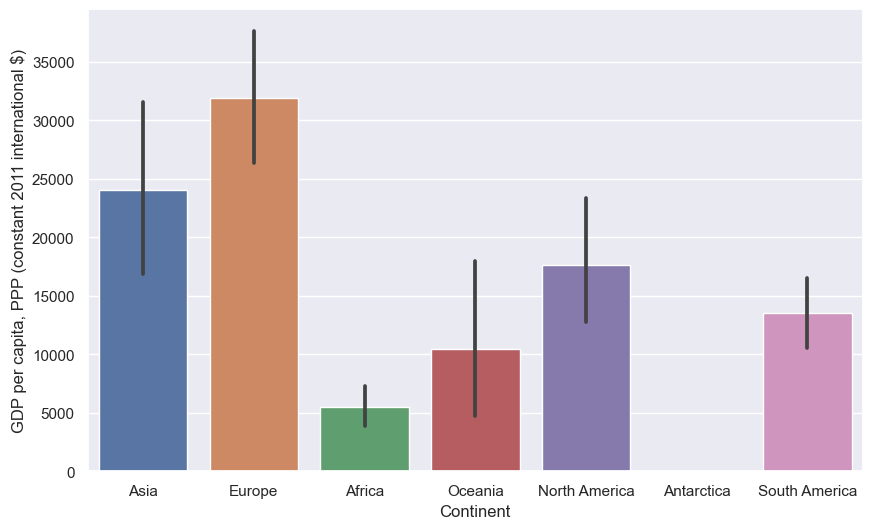

In [87]:
plt.figure(figsize=(10,6))
sns.barplot(x=new_mpw_gdp['Continent'],y=new_mpw_gdp['GDP per capita, PPP (constant 2011 international $)'])
plt.show()

- **As it is clear from the above figure, the highest is Europe and the lowest is Africa.** 
- **From the figure and above analysis we can't say Antarctica is the smallest we have many null values present in the dataset.**


### In which Continent, Mismanaged Plastic waste is more and less by per person?

In [88]:
new_mpw_gdp.shape[0] - new_mpw_gdp['Per capita mismanaged plastic waste'].isnull().sum()
# The dataset contains only 186 data points

186

In [89]:
# This dataframe only contain above 186 datapoints 
new_df = new_mpw_gdp[new_mpw_gdp['Per capita mismanaged plastic waste'].notna()]
new_df.isnull().sum()
#From the below results, We can't answer the question because we don't have any value for continent.

Entity                                                   0
Code                                                     0
Year                                                     0
Per capita mismanaged plastic waste                      0
GDP per capita, PPP (constant 2011 international $)     38
Total population (Gapminder, HYDE & UN)                  5
Continent                                              186
dtype: int64

## Dataset: Per Capita Plastic Waste VS GDP Per Capita

In [90]:
pcpw_gdp = pd.read_csv("per-capita-plastic-waste-vs-gdp-per-capita.csv")
pcpw_gdp.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [91]:
pcpw_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [92]:
pcpw_gdp.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,48168.0,1.903147e+03,3.157168e+02,-10000.00000,1859.000000,1.920000e+03,1.975000e+03,2.019000e+03
Per capita plastic waste (kg/person/day),186.0,1.798118e-01,1.230064e-01,0.01000,0.103000,1.440000e-01,2.520000e-01,6.860000e-01
"GDP per capita, PPP (constant 2011 international $)",6407.0,1.492610e+04,1.773975e+04,247.43654,3021.071807,8.447264e+03,1.960754e+04,1.353188e+05
"Total population (Gapminder, HYDE & UN)",46883.0,2.982790e+07,2.530860e+08,905.00000,201733.500000,1.542937e+06,5.886795e+06,7.713468e+09


- **From the above result, it is clear that the dataset has one different column only.**

## Dataset: Plastic Waste Per Capita

In [93]:
pwpc = pd.read_csv("plastic-waste-per-capita.csv")
pwpc.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day)
0,Albania,ALB,2010,0.069
1,Algeria,DZA,2010,0.144
2,Angola,AGO,2010,0.062
3,Anguilla,AIA,2010,0.252
4,Antigua and Barbuda,ATG,2010,0.660


In [94]:
pwpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    186 non-null    object 
 1   Code                                      186 non-null    object 
 2   Year                                      186 non-null    int64  
 3   Per capita plastic waste (kg/person/day)  186 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.9+ KB


In [95]:
pwpc.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,186.0,2010.000000,0.000000,2010.00,2010.000,2010.000,2010.000,2010.000
Per capita plastic waste (kg/person/day),186.0,0.179812,0.123006,0.01,0.103,0.144,0.252,0.686


### In 2010, in which country per person is plastic waste highest and lowest?

In [96]:
pwpc[pwpc['Per capita plastic waste (kg/person/day)'] == max(pwpc['Per capita plastic waste (kg/person/day)'])]

,Entity,Code,Year,Per capita plastic waste (kg/person/day)
91,Kuwait,KWT,2010,0.686


In [97]:
pwpc[pwpc['Per capita plastic waste (kg/person/day)'] == min(pwpc['Per capita plastic waste (kg/person/day)'])]

,Entity,Code,Year,Per capita plastic waste (kg/person/day)
79,India,IND,2010,0.01


- **So, Kuwait has highest per person waste and India has the lowest in 2010.**

## After analyzing all the datasets, we can merge all the datasets on 2010-year bases.

In [99]:
#Merging Plastic Waste Per Capita and Mismanaged Waste Global Total
merged_df = pd.merge(pwpc,mwgt, on = "Code")
merged_df.head()

,Entity_x,Code,Year_x,Per capita plastic waste (kg/person/day),Entity_y,Year_y,Mismanaged waste (% global total)
0,Albania,ALB,2010,0.069,Albania,2010,0.0933
1,Algeria,DZA,2010,0.144,Algeria,2010,1.6347
2,Angola,AGO,2010,0.062,Angola,2010,0.1964
3,Anguilla,AIA,2010,0.252,Anguilla,2010,0.0002
4,Antigua and Barbuda,ATG,2010,0.660,Antigua and Barbuda,2010,0.0039


In [101]:
#droping Entity_y and Year_y
merged_df.drop(["Entity_y","Year_y"],axis=1,inplace=True)
merged_df.head()

,Entity_x,Code,Year_x,Per capita plastic waste (kg/person/day),Mismanaged waste (% global total)
0,Albania,ALB,2010,0.069,0.0933
1,Algeria,DZA,2010,0.144,1.6347
2,Angola,AGO,2010,0.062,0.1964
3,Anguilla,AIA,2010,0.252,0.0002
4,Antigua and Barbuda,ATG,2010,0.660,0.0039


In [102]:
merged_df.isnull().sum()

Entity_x                                    0
Code                                        0
Year_x                                      0
Per capita plastic waste (kg/person/day)    0
Mismanaged waste (% global total)           0
dtype: int64

In [103]:
#renaming Entity_x and Year_x to Entity and Year
merged_df.rename(columns={"Entity_x":"Entity","Year_x":"Year"},inplace=True)
merged_df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),Mismanaged waste (% global total)
0,Albania,ALB,2010,0.069,0.0933
1,Algeria,DZA,2010,0.144,1.6347
2,Angola,AGO,2010,0.062,0.1964
3,Anguilla,AIA,2010,0.252,0.0002
4,Antigua and Barbuda,ATG,2010,0.660,0.0039


In [104]:
pcpw_gdp.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [110]:
#droping null values from Per Capita Plastic Waste VS GDP Per Capita dataset
df = pcpw_gdp[pcpw_gdp['GDP per capita, PPP (constant 2011 international $)'].notna() & 
              pcpw_gdp['Total population (Gapminder, HYDE & UN)'].notna()]
df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN


In [113]:
#only for 2010
df = df[df['Year'] == 2010]
df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
9,Afghanistan,AFG,2010,NaN,1614.255001,29186000.0,NaN
344,Albania,ALB,2010,0.069,9927.181841,2948000.0,NaN
564,Algeria,DZA,2010,0.144,12870.602699,35977000.0,NaN
1074,Angola,AGO,2010,0.062,5897.682841,23356000.0,NaN
1365,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,NaN


In [116]:
df.drop(columns=['Per capita plastic waste (kg/person/day)','Continent'], inplace=True)

In [117]:
df.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)"
9,Afghanistan,AFG,2010,1614.255001,29186000.0
344,Albania,ALB,2010,9927.181841,2948000.0
564,Algeria,DZA,2010,12870.602699,35977000.0
1074,Angola,AGO,2010,5897.682841,23356000.0
1365,Antigua and Barbuda,ATG,2010,19212.720131,88000.0


In [118]:
df.shape

(191, 5)

In [123]:
#final merge 
final_merge = pd.merge(merged_df, df, on="Code")
final_merge.head()

,Entity_x,Code,Year_x,Per capita plastic waste (kg/person/day),Mismanaged waste (% global total),Entity_y,Year_y,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)"
0,Albania,ALB,2010,0.069,0.0933,Albania,2010,9927.181841,2948000.0
1,Algeria,DZA,2010,0.144,1.6347,Algeria,2010,12870.602699,35977000.0
2,Angola,AGO,2010,0.062,0.1964,Angola,2010,5897.682841,23356000.0
3,Antigua and Barbuda,ATG,2010,0.660,0.0039,Antigua and Barbuda,2010,19212.720131,88000.0
4,Argentina,ARG,2010,0.183,0.4955,Argentina,2010,18712.063077,40896000.0


In [125]:
final_merge.rename(columns={"Entity_x":"Entity","Year_x":"Year",
                            "Per capita plastic waste (kg/person/day)":"Plastic waste per Person(kg/day)",
                           "GDP per capita, PPP (constant 2011 international $)": "GDP per capita in PPP",
                           "Total population (Gapminder, HYDE & UN)":"Total population"},inplace=True)
final_merge.drop(columns=["Entity_y","Year_y"],inplace=True)
final_merge.head()

,Entity,Code,Year,Plastic waste per Person(kg/day),Mismanaged waste (% global total),GDP per capita in PPP,Total population
0,Albania,ALB,2010,0.069,0.0933,9927.181841,2948000.0
1,Algeria,DZA,2010,0.144,1.6347,12870.602699,35977000.0
2,Angola,AGO,2010,0.062,0.1964,5897.682841,23356000.0
3,Antigua and Barbuda,ATG,2010,0.660,0.0039,19212.720131,88000.0
4,Argentina,ARG,2010,0.183,0.4955,18712.063077,40896000.0


In [126]:
final_merge.isnull().sum()

Entity                               0
Code                                 0
Year                                 0
Plastic waste per Person(kg/day)     0
Mismanaged waste (% global total)    0
GDP per capita in PPP                0
Total population                     0
dtype: int64

In [127]:
final_merge.shape

(148, 7)

### Plastic waste per person VS GDP per person

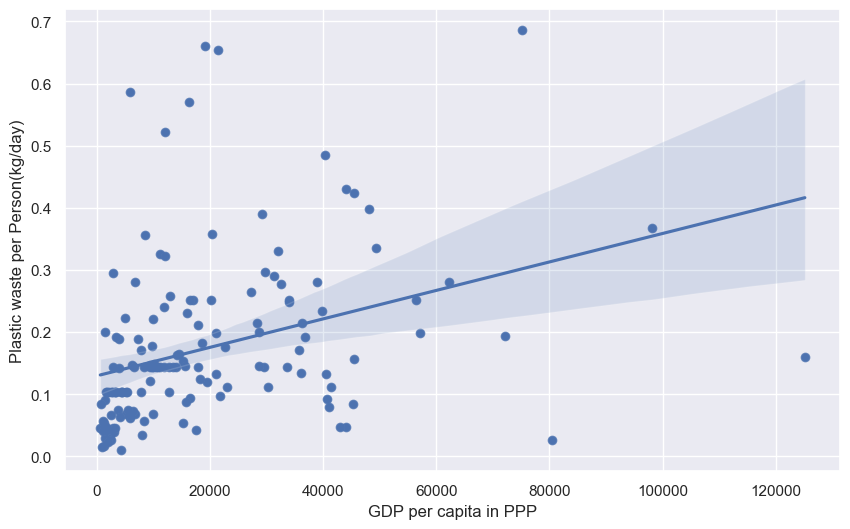

In [132]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=final_merge['Plastic waste per Person(kg/day)'],x=final_merge['GDP per capita in PPP'])
sns.regplot(y=final_merge['Plastic waste per Person(kg/day)'],x=final_merge['GDP per capita in PPP'])
plt.show()

- **It is an important finding that as the GDP per person increases Plastic waste per person also increases.**